In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from matplotlib.legend_handler import HandlerLine2D


In [62]:
os.chdir(r'C:\Users\Home\Documents\Laboral2020\Konrad Lorenz\MachineLearning\Clase8')
df=pd.read_excel('datosChurn.xlsx')
df.columns


Index(['ID', 'id_ubicacion', 'fecha', 'salario', 'sexo', 'edad', 'Tipo_nomina',
       'Antiguedad', 'casado_unionlibre', 'tipocargo', 'sindicalizado',
       'retiro'],
      dtype='object')

In [65]:
df.fecha.describe()

count                    1432
unique                     21
top       2019-09-30 00:00:00
freq                     1148
first     2018-01-31 00:00:00
last      2019-09-30 00:00:00
Name: fecha, dtype: object

In [66]:
df_dummies_sexo=pd.get_dummies(df['sexo'])
df_dummies_sexo=df_dummies_sexo.iloc[:,[1]]
df_dummies_sexo.colums=['Masculino']

df_dummies_Tipo_nomina=pd.get_dummies(df['Tipo_nomina'])
df_dummies_Tipo_nomina=df_dummies_Tipo_nomina.iloc[:,[1,2,3]]

df_dummies_casado_unionlibre=pd.get_dummies(df['casado_unionlibre'])
df_dummies_casado_unionlibre=df_dummies_casado_unionlibre.iloc[:,[1]]
df_dummies_casado_unionlibre.colums=['casado']


df_dummies_tipocargo=pd.get_dummies(df['tipocargo'])
df_dummies_tipocargo=df_dummies_tipocargo.iloc[:,[1,2,3,4]]


df_dummies_sindicalizado=pd.get_dummies(df['sindicalizado'])
df_dummies_sindicalizado=df_dummies_sindicalizado.iloc[:,[1]]

df_dummies_ubicacion=pd.get_dummies(df['id_ubicacion'])
df_dummies_ubicacion=df_dummies_ubicacion.iloc[:,[1,2,3,4,5]]

df_dummies=pd.concat([df_dummies_sexo,df_dummies_Tipo_nomina,df_dummies_casado_unionlibre,df_dummies_tipocargo,df_dummies_sindicalizado,df_dummies_ubicacion], axis=1)
df_dummies.rename(columns = {'M':'Masculino', 1:'Casado'}, inplace = True) 
df_dummies.columns

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


Index(['Masculino', 'LEY 50 NOMINAL TERMINO FIJO',
       'LEY 50 NOMINAL TERMINO INDEFIN', 'LEY TRADICIONAL NOMINAL', 'Casado',
       'Comercial', 'Lideres-Claves', 'Operativo', 'Soporte',
       'NO SINDICALIZADO', 'B', 'C', 'D', 'E', 'F'],
      dtype='object')

In [68]:
df_dummies.head()

,Masculino,LEY 50 NOMINAL TERMINO FIJO,LEY 50 NOMINAL TERMINO INDEFIN,LEY TRADICIONAL NOMINAL,Casado,Comercial,Lideres-Claves,Operativo,Soporte,NO SINDICALIZADO,B,C,D,E,F
0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0


In [69]:
df=df.drop(columns=['fecha', 'sexo', 'Tipo_nomina', 'casado_unionlibre', 'tipocargo', 'sindicalizado', "id_ubicacion"])

In [51]:
df

,ID,salario,edad,Antiguedad,retiro
0,1,1777000,23,34,1
1,2,1103400,32,44,0
2,3,1103400,19,7,1
3,4,1140000,21,11,0
4,5,1103400,35,37,0
...,...,...,...,...,...
1427,1428,6346400,34,22,0
1428,1429,10800000,34,76,0
1429,1430,12500000,35,27,0
1430,1431,10887500,45,188,0


In [70]:
df=pd.concat([df,df_dummies], axis=1)
df.columns

Index(['ID', 'salario', 'edad', 'Antiguedad', 'retiro', 'Masculino',
       'LEY 50 NOMINAL TERMINO FIJO', 'LEY 50 NOMINAL TERMINO INDEFIN',
       'LEY TRADICIONAL NOMINAL', 'Casado', 'Comercial', 'Lideres-Claves',
       'Operativo', 'Soporte', 'NO SINDICALIZADO', 'B', 'C', 'D', 'E', 'F'],
      dtype='object')

In [71]:
# Select only the numeric features
X=df.iloc[:,[1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] ]
# Convert bools to floats
y=df.iloc[:,4]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
y_test.shape

(473,)

# Random Forest

In [76]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rfc_pred = model_rf.predict(X_test)
rfc_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [56]:
y_test.shape

(473,)

In [77]:
y_pred_rf = model_rf.predict(X_test)
false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
roc_auc_rf

0.7857896838982084

In [87]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix : \n', cm_rf)

total1=sum(sum(cm_rf))
#####from confusion matrix calculate accuracy
accuracy1=(cm_rf[0,0]+cm_rf[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[371  10]
 [ 37  55]]
Accuracy :  0.9006342494714588
Sensitivity :  0.973753280839895
Specificity :  0.5978260869565217


In [88]:
(371+55)/473

0.9006342494714588

In [89]:
55 / 92 # dado que se retira: (capacidad del modelo para predecir correctamente)

0.5978260869565217

In [98]:
y_pred_rf2 = (model_rf.predict_proba(X_test)[:,1] >= 0.30).astype(bool) # set threshold as 0.3

In [99]:
false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y_test, y_pred_rf2)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
roc_auc_rf

0.791780782836928

In [85]:
cm_rf = confusion_matrix(y_test,y_pred_rf2)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm_rf))
#####from confusion matrix calculate accuracy
accuracy1=(cm_rf[0,0]+cm_rf[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm_rf[0,0]/(cm1[0,0]+cm_rf[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[375   6]
 [ 39  53]]
Accuracy :  0.8837209302325582
Sensitivity :  0.9042821158690176
Specificity :  0.6413043478260869


In [58]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000] # n_estimators is the number of trees to be used in the fores
}

model_rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)
rfc_pred = grid_search.predict(X_test)
rfc_pred

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.9min finished


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [100]:
cm_rf = confusion_matrix(y_test,rfc_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm_rf))
#####from confusion matrix calculate accuracy
accuracy1=(cm_rf[0,0]+cm_rf[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[375   6]
 [ 39  53]]
Accuracy :  0.9006342494714588
Sensitivity :  0.973753280839895
Specificity :  0.5978260869565217


In [ ]:
Gradient Boosting

In [102]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
false_positive_rate_gb, true_positive_rate_gb, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc_gb = auc(false_positive_rate_gb, true_positive_rate_gb)
roc_auc_gb

0.7801694625128383

In [103]:
cm1 = confusion_matrix(y_test,y_pred_gb)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[375   6]
 [ 39  53]]
Accuracy :  0.904862579281184
Sensitivity :  0.984251968503937
Specificity :  0.5760869565217391


 Porbar con diferentes variables:

In [37]:
375     / (375    + 6)

0.984251968503937

In [36]:
53  / (39 + 53)

0.5760869565217391

Se prueban diferentes modelos

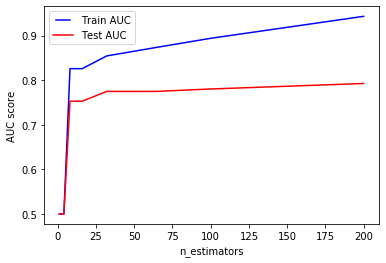

In [104]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# Ada boosting